# Cosntructing an RF model for emotion recognition

### 1. Training(tougher part was getting the data)

In [14]:
import pickle

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [15]:
data_file = "../../Data/Synthetic-FER-dataset/data.txt"
data = np.loadtxt(data_file)

In [16]:
X = data[:, :-1]  # Features are all columns except the last one
y = data[:, -1]   # Labels are the last column

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

In [18]:
rf_classifier = RandomForestClassifier()

In [19]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
y_pred = rf_classifier.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 71.92%


<Axes: >

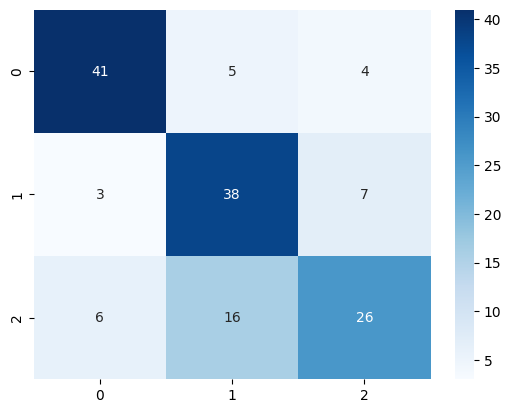

In [22]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

In [23]:
# classification report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82        50
         1.0       0.64      0.79      0.71        48
         2.0       0.70      0.54      0.61        48

    accuracy                           0.72       146
   macro avg       0.72      0.72      0.71       146
weighted avg       0.72      0.72      0.72       146



In [25]:
# saving the model
with open('../../Models/FER models/RFmodels/model_v1.p', 'wb') as f:
    pickle.dump(rf_classifier, f)

### 2. Testing

In [28]:
import pickle
import cv2
import mediapipe as mp


In [29]:



def get_face_landmarks(image, draw=False, static_image_mode=True):

    # Read the input image
    image_input_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    face_mesh = mp.solutions.face_mesh.FaceMesh(static_image_mode=static_image_mode,
                                                max_num_faces=1,
                                                min_detection_confidence=0.5)
    image_rows, image_cols, _ = image.shape
    results = face_mesh.process(image_input_rgb)

    image_landmarks = []

    if results.multi_face_landmarks:

        if draw:

            mp_drawing = mp.solutions.drawing_utils
            mp_drawing_styles = mp.solutions.drawing_styles
            drawing_spec = mp_drawing.DrawingSpec(thickness=2, circle_radius=1)

            mp_drawing.draw_landmarks(
                image=image,
                landmark_list=results.multi_face_landmarks[0],
                connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
                landmark_drawing_spec=drawing_spec,
                connection_drawing_spec=drawing_spec)

        ls_single_face = results.multi_face_landmarks[0].landmark
        xs_ = []
        ys_ = []
        zs_ = []
        for idx in ls_single_face:
            xs_.append(idx.x)
            ys_.append(idx.y)
            zs_.append(idx.z)
        for j in range(len(xs_)):
            image_landmarks.append(xs_[j] - min(xs_))
            image_landmarks.append(ys_[j] - min(ys_))
            image_landmarks.append(zs_[j] - min(zs_))

    return image_landmarks

In [31]:
emotions = ['HAPPY', 'SAD', 'SURPRISED']

with open('../../Models/FER models/RFmodels/model_v1.p', 'rb') as f:
    model = pickle.load(f)

In [33]:
cap = cv2.VideoCapture(0)

ret, frame = cap.read()
while ret:
    ret, frame = cap.read()

    face_landmarks = get_face_landmarks(frame, draw=True, static_image_mode=False)

    output = model.predict([face_landmarks])

    cv2.putText(frame, emotions[int(output[0])],(10, frame.shape[0] - 1),cv2.FONT_HERSHEY_SIMPLEX,3,(0, 255, 0),5)

    cv2.imshow('frame', frame)

    cv2.waitKey(25)


cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

: 